This is a project on Sport Analytics. This project is aimed at getting insights and correlations between player values, age, special attributes and performance.

This interpreted data can further be converted into useful informations after analyzing it. The insights provided through these results include enable users to act smartly when playing FIFA, picking a better team when playing the popular Fantasy Premier League (FPL). 

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
#basic operations
import numpy as np

#for dataframe manipulations
import pandas as pd

#for data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#for missing values
import missingno as mno

#for date time manipulation
import datetime

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up the background style for the plots
plt.style.use('fivethirtyeight')


In [3]:
#reading the data 

data = pd.read_csv("C:/Users/USER/Desktop/Python Scripts/Player Performance Review/Player Performance  Reviewer - Full Material\data-1.csv")

In [4]:
#Lets check the shape of the dataset

print(data.shape)

(18207, 89)


In [5]:
#Checking the column names present in the data

data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
#Checking for the first 5rows of the dataset

data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
#Lets describe the data for the Numerical Columns

pd.set_option('max_columns', 100)
data.iloc[:, 2:].describe().style.background_gradient(cmap = 'cividis')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
# Lets check the descriptive statistics for the categorical columns as well

data.iloc[:, 13:].describe(include = 'object')

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


Cleaning Data

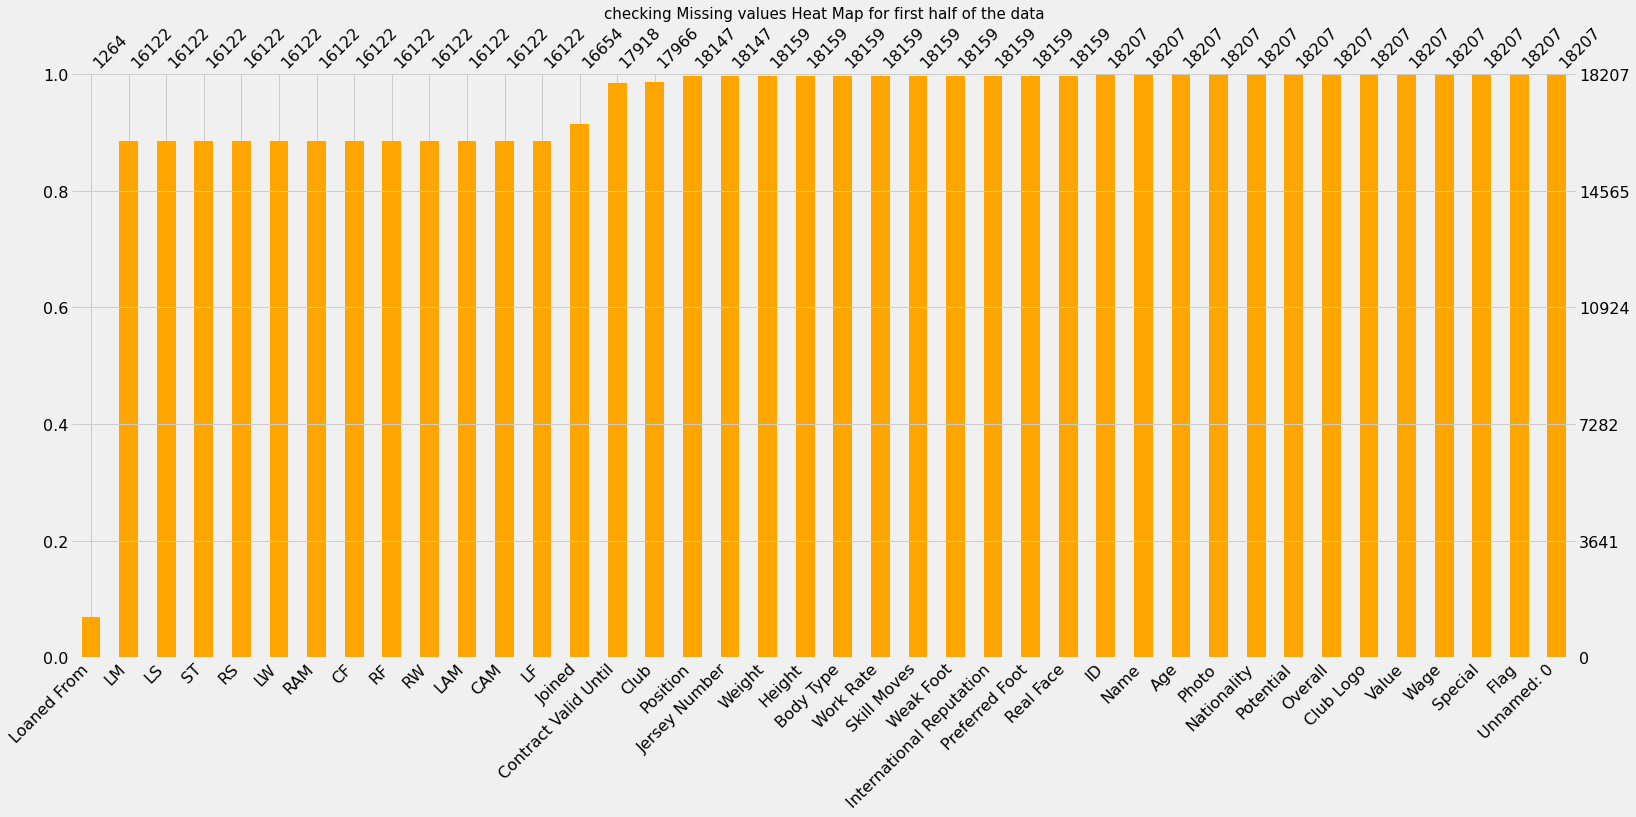

In [9]:
#Checking if the data contains any NULL value
#Visualize missing values asa matrix


mno.bar(data.iloc[:, :40],
       color = 'orange',
       sort = 'ascending')
plt.title('checking Missing values Heat Map for first half of the data', fontsize = 15)
plt.show()

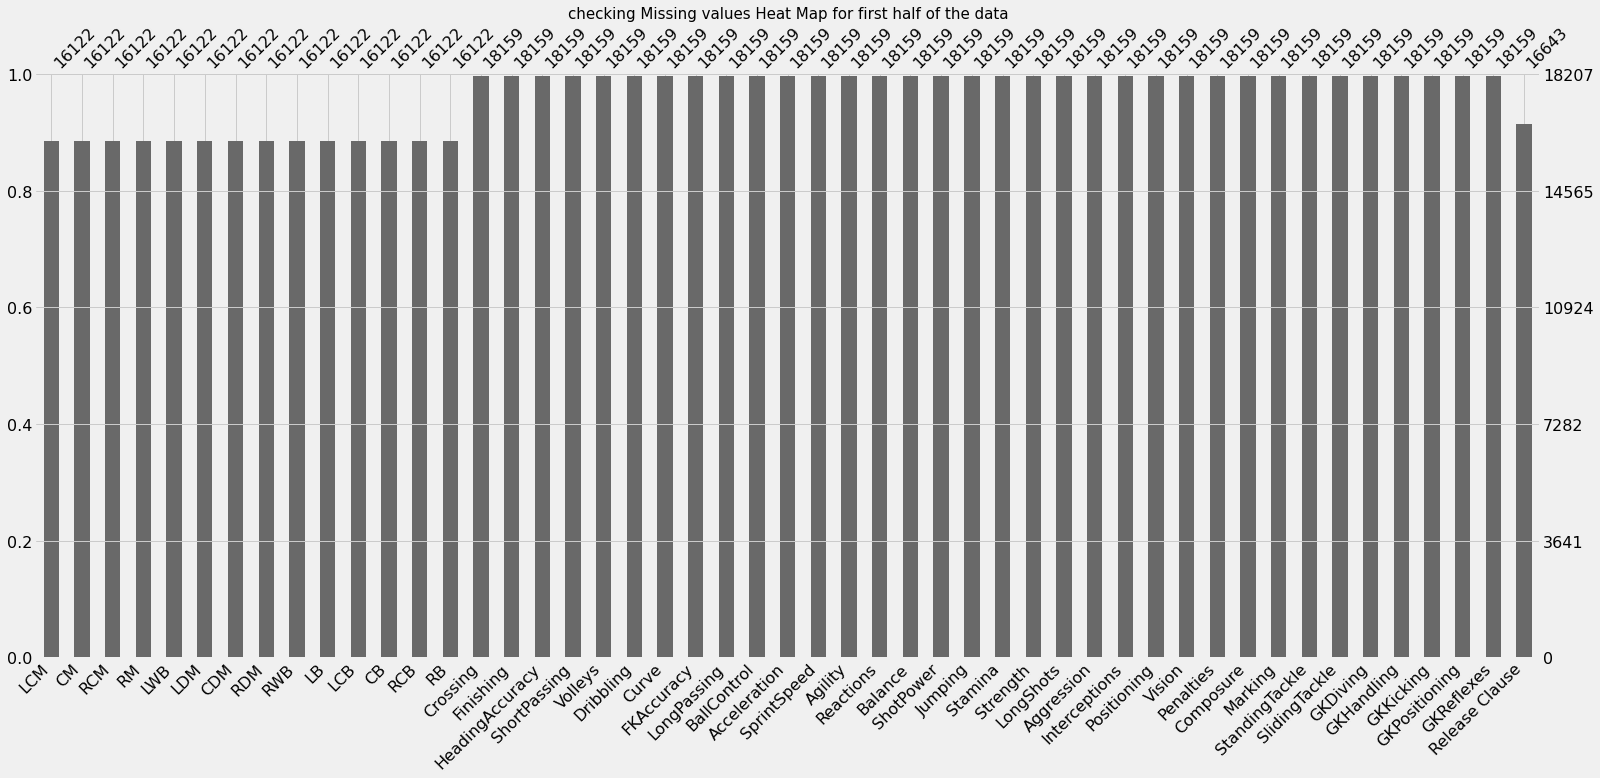

In [10]:
#Visualize missing values as a matrix

mno.bar(data.iloc[:, 40:])
plt.title('checking Missing values Heat Map for first half of the data', fontsize = 15)
plt.show()

Missing Values Imputation

In [11]:
#filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/Medium', inplace = True)
data['Skill Moves'].fillna('Skill Moves', inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('$200k', inplace = True)
data.fillna(0, inplace = True)
                              
# Lets check whether the data still has any missing values
data.isnull().sum()

Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64

Feature Engineering

In [12]:
# Creating new features by aggregating the Features

#These are grouped according to what they represent and so, they will be used to 

def defending(data):
    return int(round((data[['Marking','StandingTackle',
                           'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy','Dribbling','Curve',
                           'BallControl']].mean()).mean()))
def mental(data):
    return int(round((data[['Aggression','Interceptions','Positioning',
                           'Vision','Composure']].mean()).mean()))
def passing(data):
    return int(round((data[['Crossing','ShortPassing',
                           'LongPassing']].mean()).mean()))
def mobility(data):
    return int(round((data[['Acceleration','SprintSpeed',
                           'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance','Jumping','Stamina',
                           'Strength']].mean()).mean()))
def rating(data):
    return int(round((data[['Potential','Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing','Volleys','FKAccuracy',
                           'ShotPower','LongShots','Penalties']].mean()).mean()))



In [13]:
#Adding these categories to the data

data['Defending'] = data.apply(defending,axis = 1)
data['General'] = data.apply(general,axis = 1)
data['Mental'] = data.apply(mental,axis = 1)
data['Passing'] = data.apply(passing,axis = 1)
data['Mobility'] = data.apply(mobility,axis = 1)
data['Power'] = data.apply(power,axis = 1)
data['Rating'] = data.apply(rating,axis = 1)
data['Shooting'] = data.apply(shooting,axis = 1)



In [14]:
#Checking the column names in the data after adding new features

data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Data Visualization

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

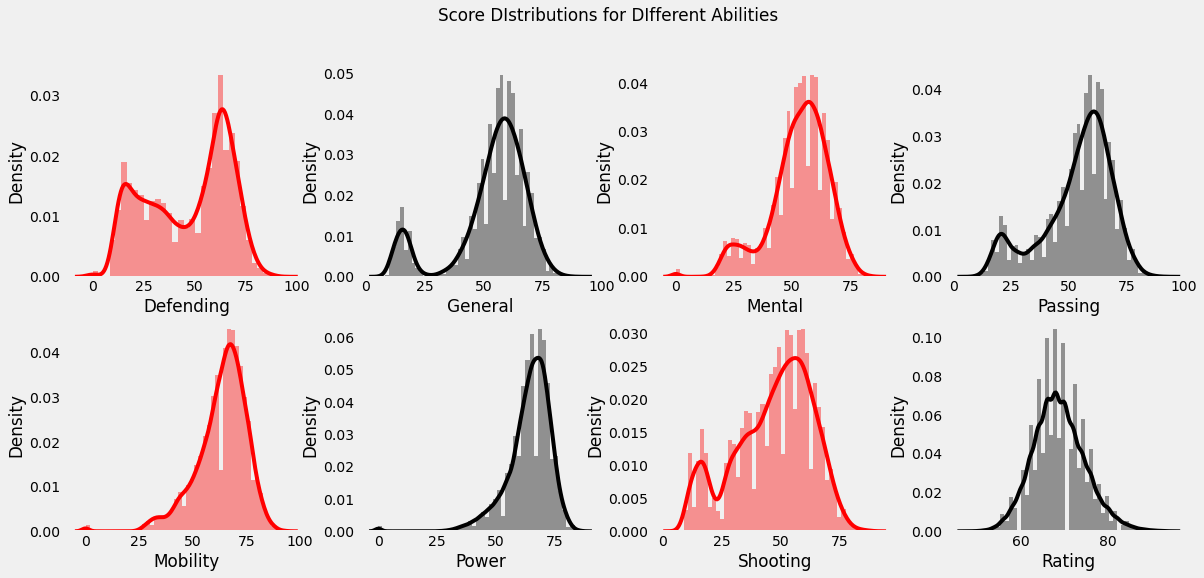

In [15]:
#Lets check the distribution of scores of different Skills

plt.rcParams['figure.figsize'] = (18,8)
plt.subplot(2,4,1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score DIstributions for DIfferent Abilities')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


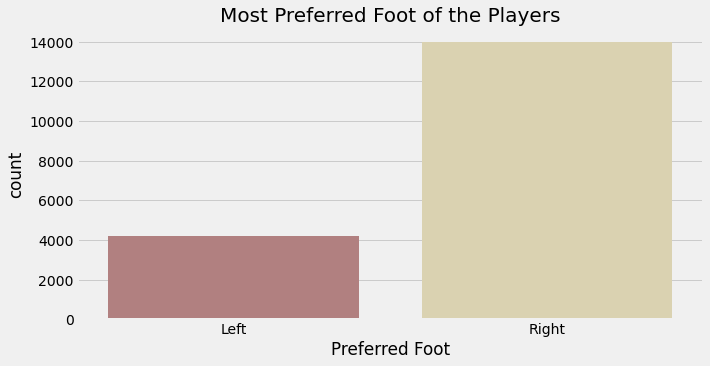

In [16]:
#Comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

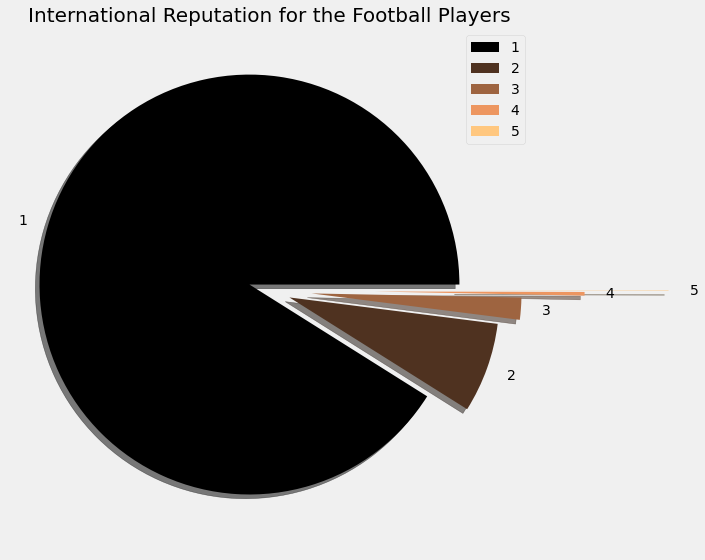

In [17]:
#Plotting a pie chart to represent share of international reputation

labels = ['1','2','3','4','5']
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0.1,0.1,0.2,0.5,0.9]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Reputation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

In [18]:
#Lets Check the players that have a 5 rating
# Funfact - I hope Ronaldo is first, lol

data[data['International Reputation'] == 5][['Name', 'Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                                   ascending = False).style.background_gradient(cmap = 'magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


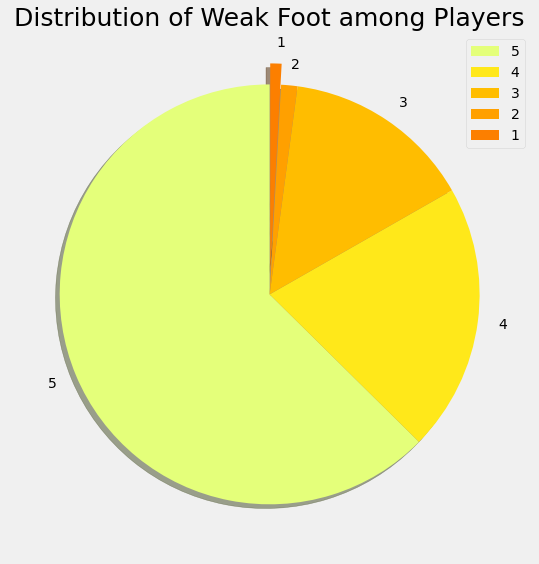

In [19]:
#plotting a pie chart to represent the share of weak foot players

labels = ['5','4','3','2','1']
sizes = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Weak Foot among Players', fontsize = 25)
plt.legend()
plt.show()

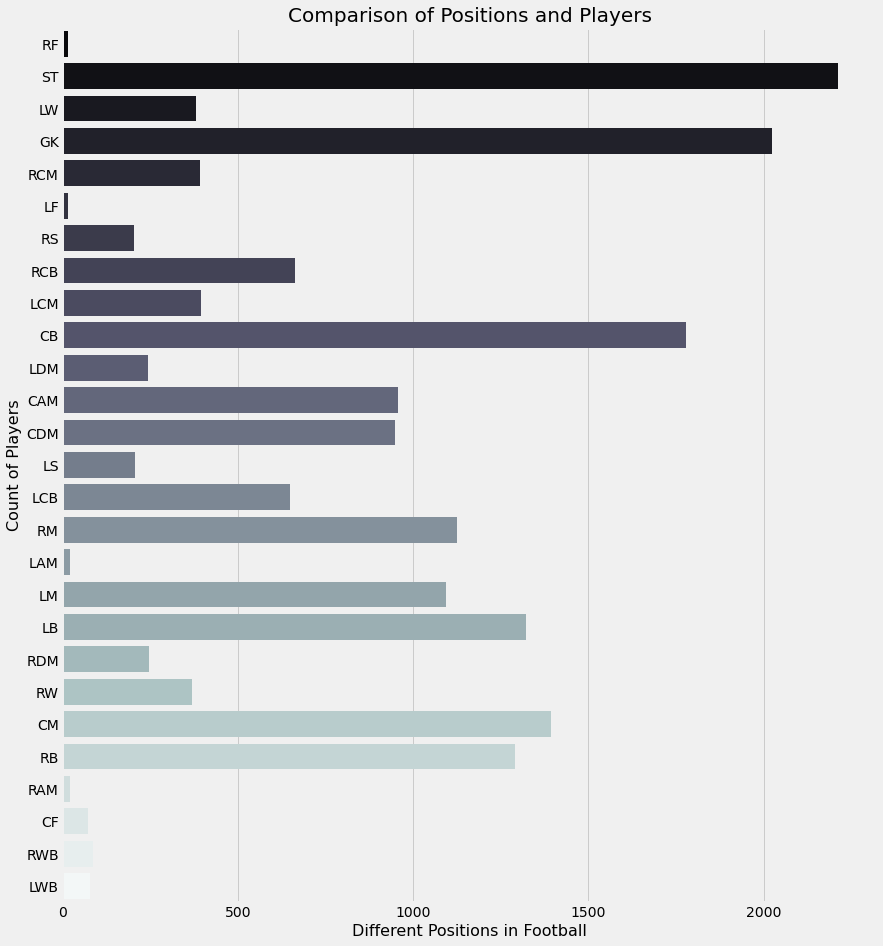

In [20]:
# Countplot construct for different Positions acquired by the players

plt.figure(figsize = (13,15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


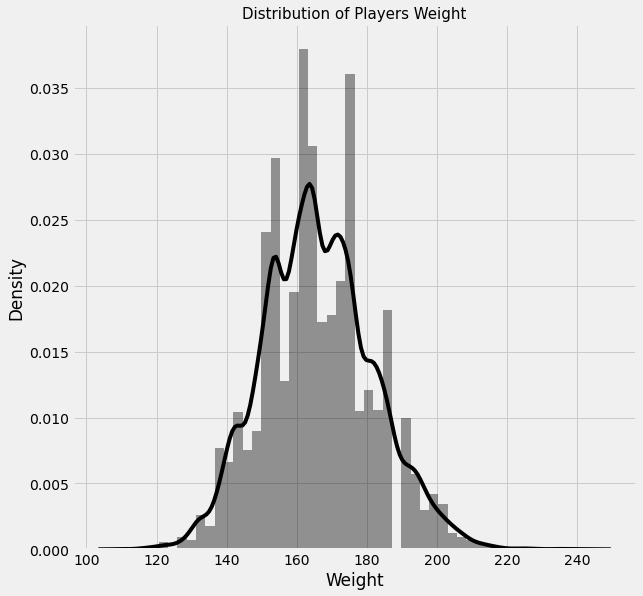

In [21]:
#defining a function for cleaning the weight data

def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)

#applying the function to weight column
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

#plotting the distribution of weight of the players
sns.distplot(data['Weight'],color = 'black')
plt.title('Distribution of Players Weight', fontsize = 15)
plt.show()

In [22]:
#Defining a function for cleaning the wage column

def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)
            

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


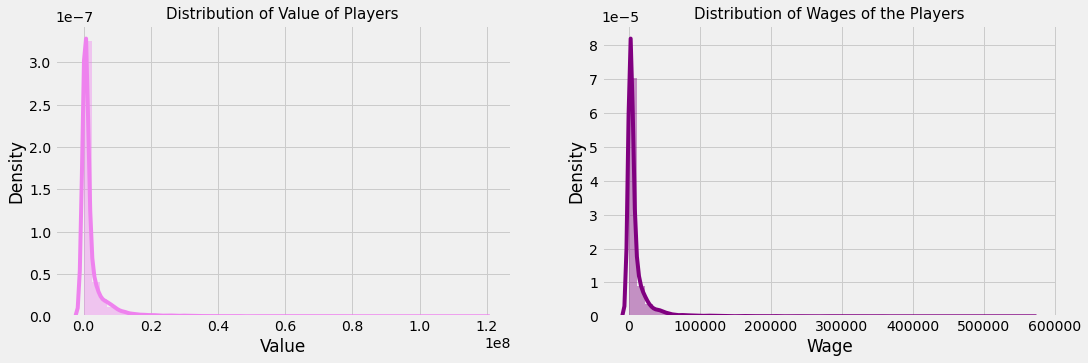

In [23]:
#Applying the function to the wage and column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

#Visualizing the data
plt.rcParams['figure.figsize'] = (16,5)
plt.subplot(1,2,1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of Players', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players',fontsize = 15)
plt.show()

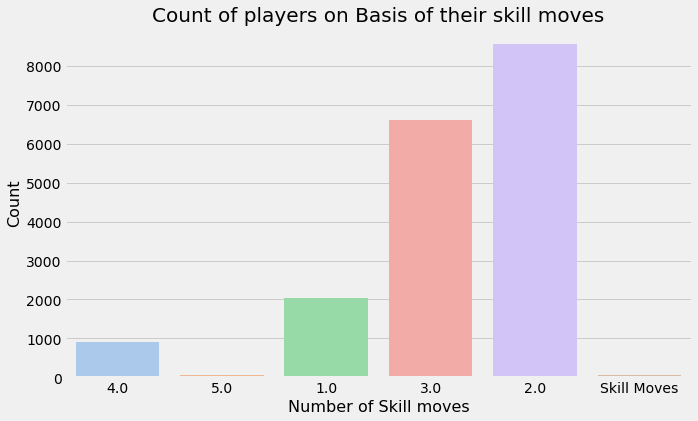

In [24]:
#Visualizing using countplot the skill moves of Players

plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

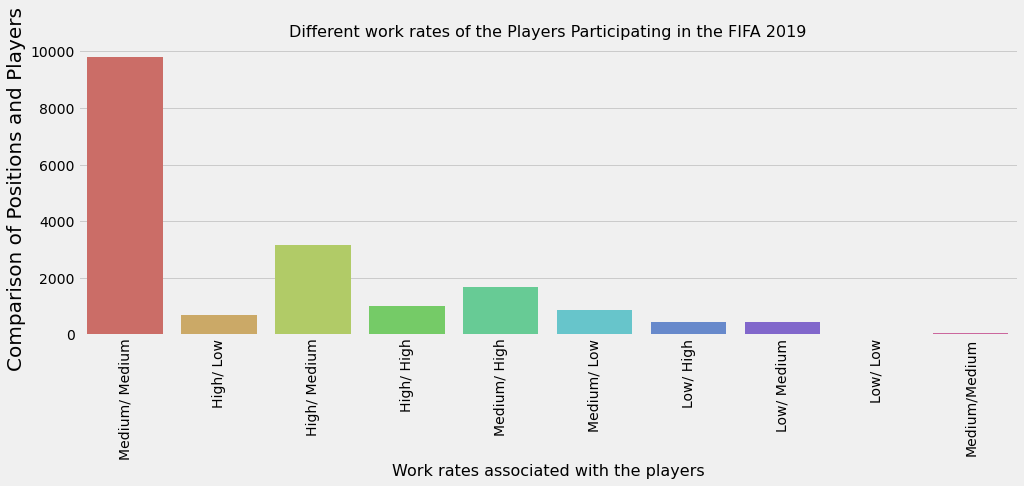

In [25]:
# To show different work rate of the players participating in the fifa 2019

plt.figure(figsize = (15,5))
plt.style.use('fivethirtyeight')

ax = sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 16)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('Comparison of Positions and Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


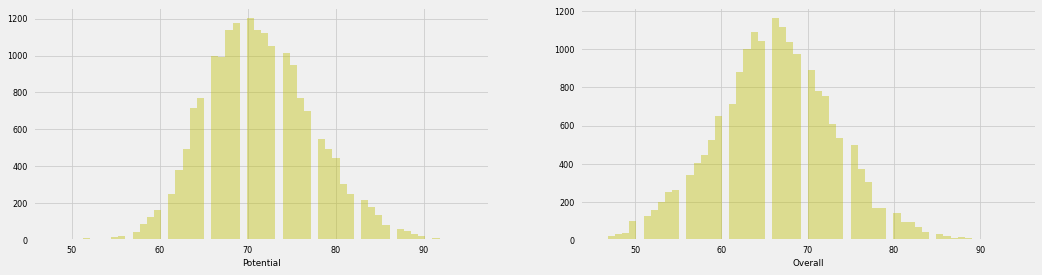

In [26]:
# To show different potential scores of the players participating in the FIFA 2019

plt.figure(figsize = (16,4))
plt.style.use('seaborn-paper')

plt.subplot(1,2,1)
x = data.Potential
ax.set = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 10)
ax.set_title(label = 'Histogram of Players potential Scores', fontsize = 15)

plt.subplot(1,2,2)
x = data.Overall
ax.set = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 10)
ax.set_title(label = 'Histogram of Players potential Scores', fontsize = 15)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


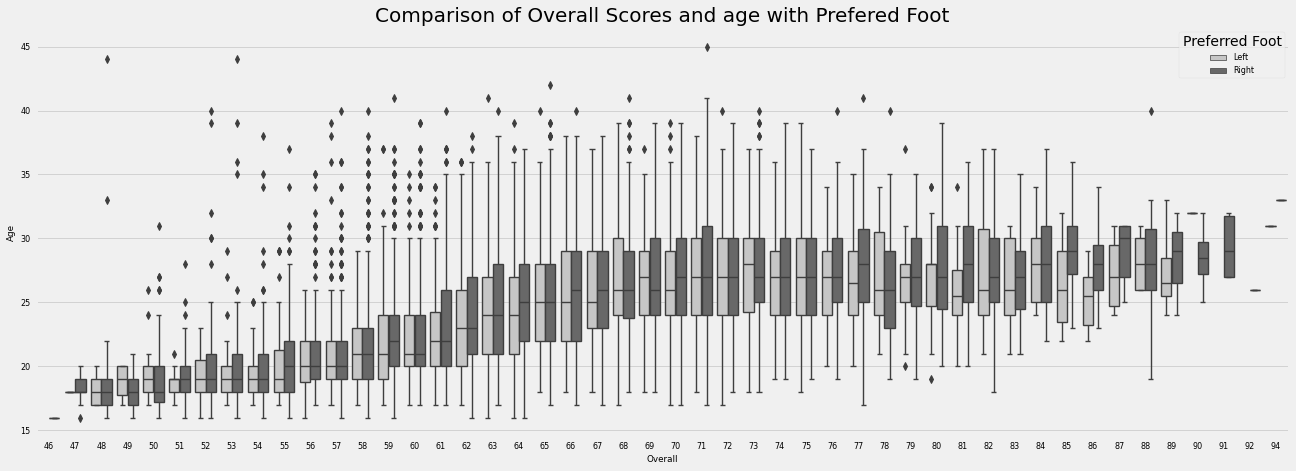

In [27]:
#Overall Plot and Age Comparison

plt.rcParams['figure.figsize'] = (20,7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'],data['Age'],hue = data['Preferred Foot'],palette = 'Greys')
plt.title('Comparison of Overall Scores and age with Prefered Foot', fontsize = 20)
plt.show()

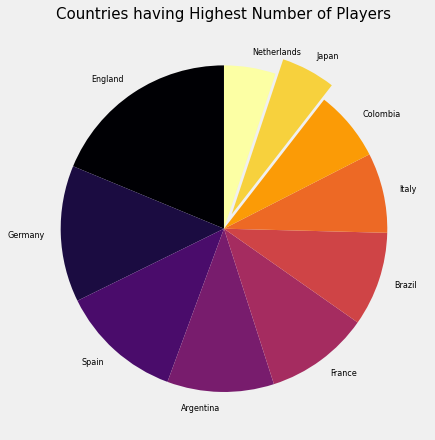

In [28]:
# Checking for the popular countries playing FIFA and the number of players that they have 

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                                startangle = 90, explode = [0,0,0,0,0,0,0,0,0.1,0])
plt.title('Countries having Highest Number of Players', fontsize = 15)
plt.axis('off')
plt.show()

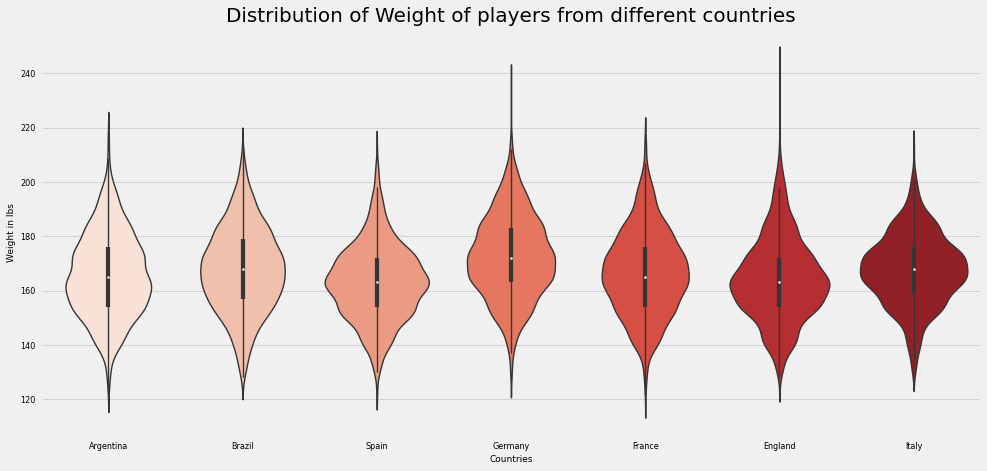

In [29]:
#Every Nations Player and their weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina','France', 'Brazil','Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['Weight']]

plt.rcParams['figure.figsize']= (15,7)
ax = sns.violinplot(x = data_countries['Nationality'],y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = "Countries", fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

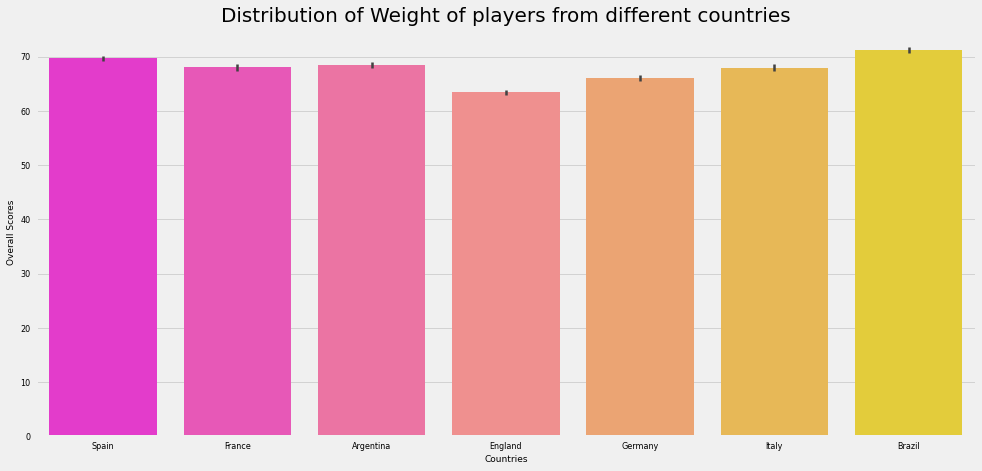

In [30]:
# Every Nations player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina','France', 'Brazil','Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['Overall']]

plt.rcParams['figure.figsize']= (15,7)
ax = sns.barplot(x = data_countries['Nationality'],y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = "Countries", fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

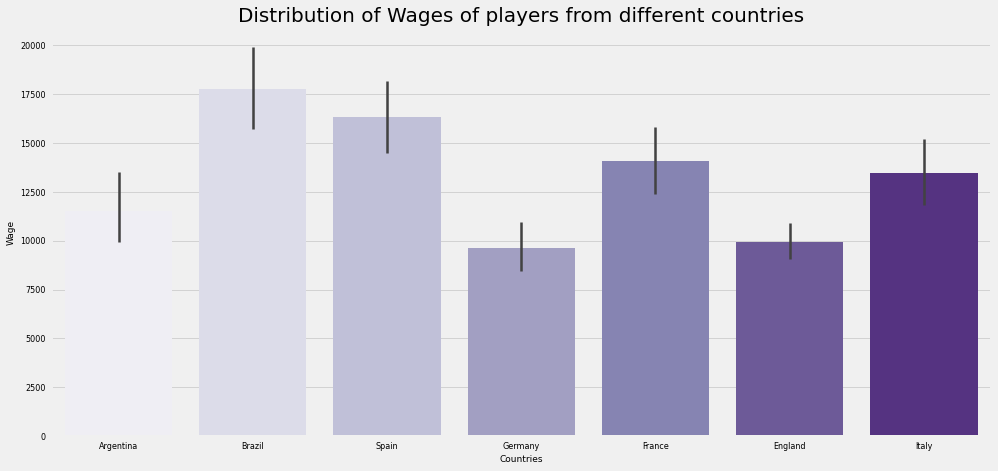

In [31]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina','France', 'Brazil','Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['Wage']]

plt.rcParams['figure.figsize']= (15,7)
ax = sns.barplot(x = data_countries['Nationality'],y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = "Countries", fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 20)
plt.show()

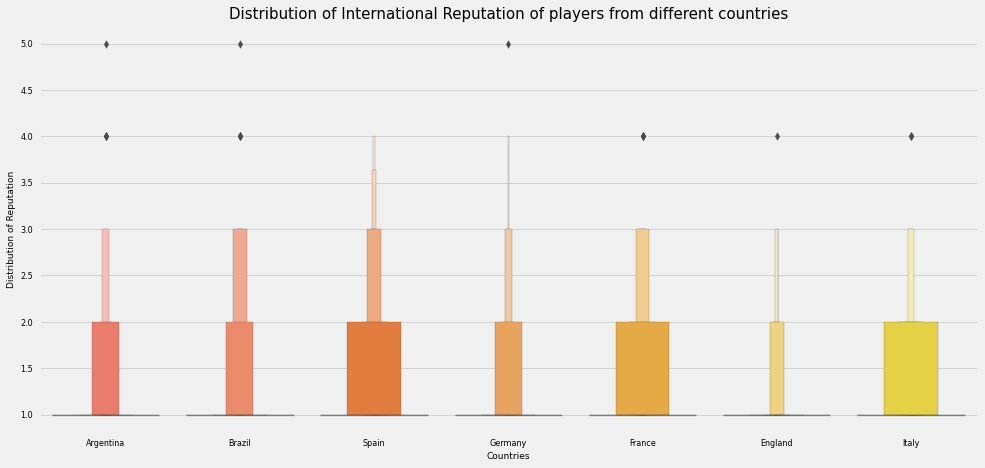

In [32]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina','France', 'Brazil','Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)& data['International Reputation']]

plt.rcParams['figure.figsize']= (15,7)
ax = sns.boxenplot(x = data_countries['Nationality'],y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = "Countries", fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Reputation of players from different countries', fontsize = 15)
plt.show()

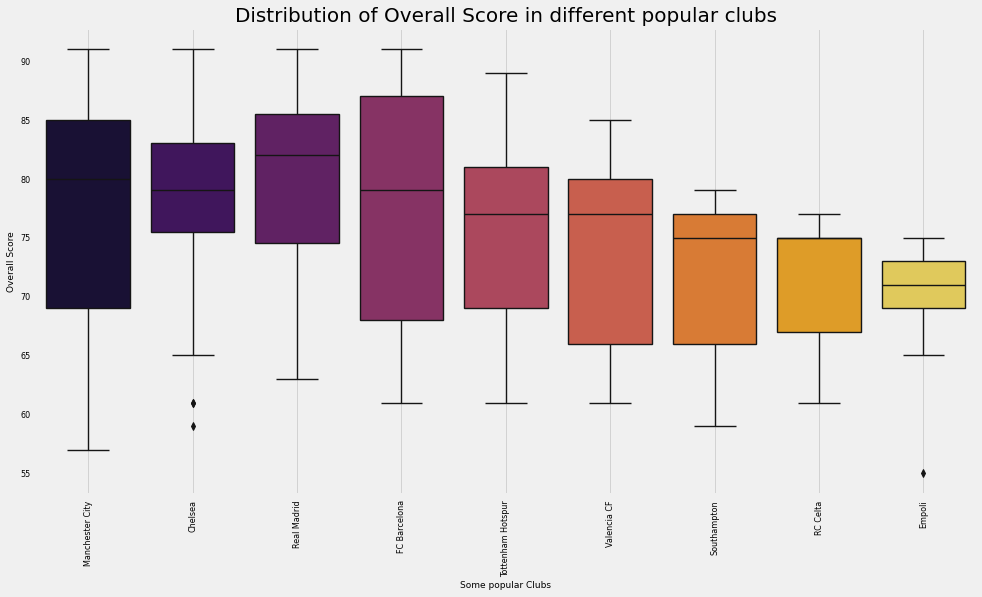

In [33]:
some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Dusseldorf', 'Manchester City', 'Tottenham Hotspur',
             'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = data.loc[data['Club'].isin(some_clubs)& data['Overall']]

plt.rcParams['figure.figsize']= (15,8)
ax = sns.boxplot(x = data_clubs['Club'],y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in different popular clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

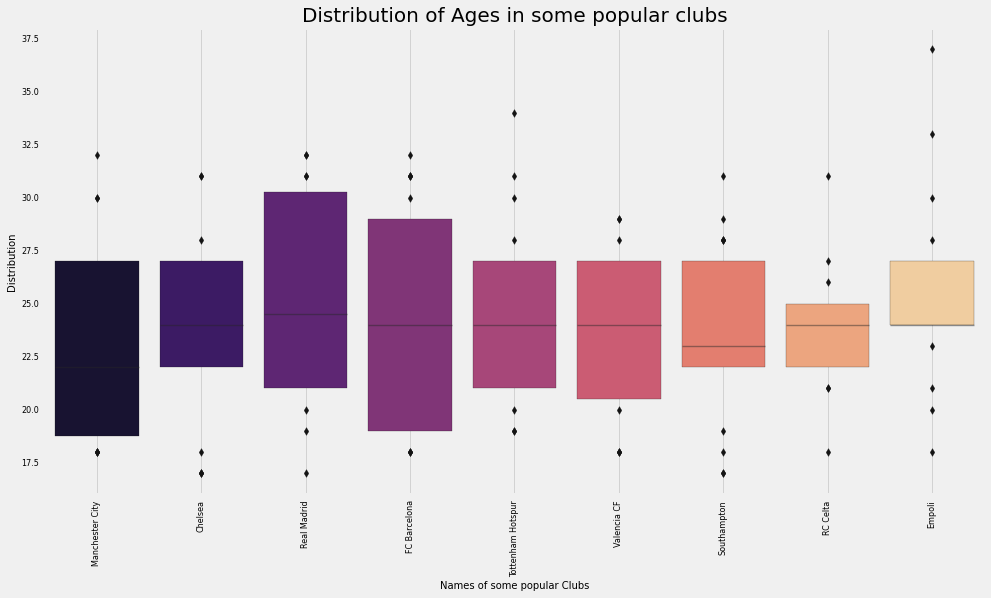

In [34]:
# DIstribution of Ages in Popular Clubs

some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Dusseldorf', 'Manchester City', 'Tottenham Hotspur',
             'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs)& data['Wage']]

plt.rcParams['figure.figsize']= (15,8)
ax = sns.boxenplot(x = data_clubs['Club'],y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Ages in some popular clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

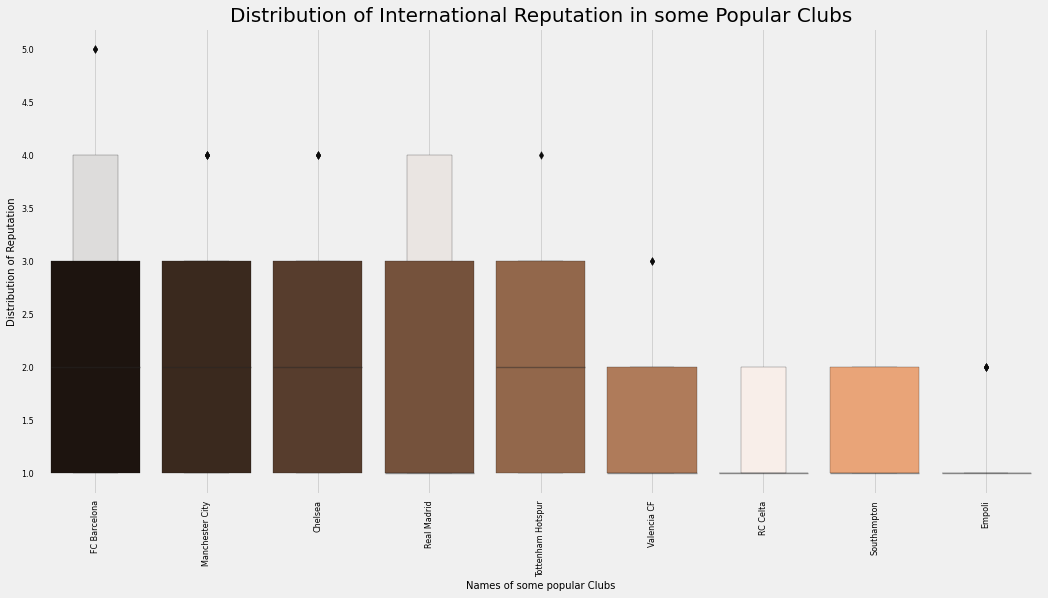

In [35]:
#Distribution of wages in some popular clubs

some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Dusseldorf', 'Manchester City', 'Tottenham Hotspur',
             'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs)& data['International Reputation']]

plt.rcParams['figure.figsize']= (16,8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation',data = data_club, palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

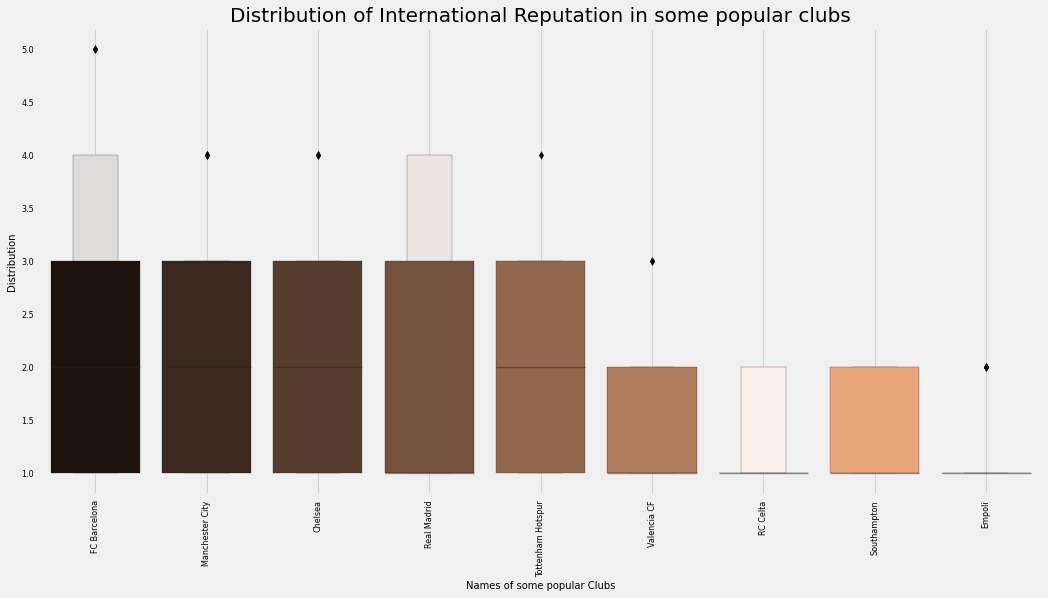

In [36]:


some_clubs = ('CD Leganes', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Dusseldorf', 'Manchester City', 'Tottenham Hotspur',
             'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = data.loc[data['Club'].isin(some_clubs)& data['International Reputation']]

plt.rcParams['figure.figsize']= (16,8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation',data = data_club, palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some popular clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

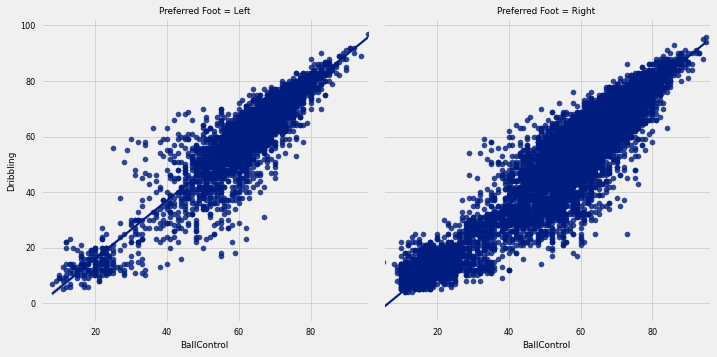

In [37]:
# Comparing the performance of left - footed footballers
# ballcontrol vs dribbling

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

Query Analysis

In [38]:
# Best Players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position','Name','Age','Club',
                                                              'Nationality', 'Overall']].sort_values(by = 'Overall',
                                                                                                ascending = False).style.background_gradient(cmap = 'pink')

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [39]:
#Best players for each skill

@interact
def skills(skills = ['Defending', "General", 'Mental', 'Passing',
                    'Mobility', 'Power', 'Rating', 'Shooting'], score = 75):
    return data[data[skills] > score][['Name','Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                                                                                     ascending = False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [40]:
# Lets make an innteractives function for getting a report of the players country wise

#Lets make a function to see the list of the top 15 players from each country

@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name','Position', 'Overall',
                                                 'Potential']].sort_values(by = 'Overall',
                                                 ascending = False).head(15).style.background_gradient(cmap = 'magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [41]:
# Lets make an innteractives function for getting a report of the players club

#lets define a function

@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club][['Name','Jersey Number', 'Position', 'Overall', 'Nationality', 'Age','Wage','Value',
                                                 'Contract Valid Until']].sort_values(by = 'Overall',
                                                 ascending = False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('Wolverhampton Wanderers', 'RC Celta', 'Frosinone'…

In [42]:
#Finding out the yopungest players in FIFA 2019

youngest = data[data['Age'] == 16][['Name','Age','Club','Nationality','Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

,Name,Age,Club,Nationality,Overall
11457,W. Geubbels,16,AS Monaco,France,64
11732,A. Taoui,16,Toulouse Football Club,France,64
12496,Pelayo Morilla,16,Real Sporting de Gijón,Spain,63
12828,Guerrero,16,CF Rayo Majadahonda,Spain,63
13293,H. Massengo,16,AS Monaco,France,62


In [43]:
#finding 15 eldest players in FIFA 2019
data.sort_values('Age', ascending = False)[['Name','Age','Club','Nationality',
                                           'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

,Name,Age,Club,Nationality,Overall
4741,O. Pérez,45,Pachuca,Mexico,71
18183,K. Pilkington,44,Cambridge United,England,48
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago,53
10545,S. Narazaki,42,Nagoya Grampus,Japan,65
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina,68
1120,J. Villar,41,No Club,Paraguay,77
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia,63
15426,M. Tyler,41,Peterborough United,England,59
4228,B. Nivet,41,ESTAC Troyes,France,71
10356,F. Kippe,40,Lillestrøm SK,Norway,65


In [44]:
# The longest Membership in the club

now = datetime.datetime.now()
data['join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1])
data['Years_of_member'] = (data.join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name','Club','Years_of_member']].sort_values(by = 'Years_of_member', ascending =False).head(10)
membership.set_index('Name', inplace = True)
membership.style.background_gradient(cmap = 'Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,30
M. Al Shalhoub,Al Hilal,23
H. Sogahata,Kashima Antlers,23
M. Ogasawara,Kashima Antlers,23
S. Narazaki,Nagoya Grampus,22
M. Wölfli,BSC Young Boys,21
K. Kitamoto,Vissel Kobe,21
C. Källqvist,BK Häcken,20
Y. Endo,Gamba Osaka,20


In [45]:
import ipywidgets as widgets
from ipywidgets import interact

@interact
def check (column = 'Years_of_member',
          club = ['FC Barcelona','Real Madrid','Chelsea'],membership = 4):
    return data[(data[column] > membership) & (data['Club'] == club)][['Name','Club',
                                                'Years_of_member']].sort_values(by = 'Years_of_member',
                                                                           ascending = False).style.background_gradient(cmap = 'magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [46]:
#Defining features of each Players

player_features = ('Acceleration', 'Aggression', 'Agility',
                   'Balance', 'BallControl', 'Composure',
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling',
                  'GKKicking', 'GKPositioning', 'GKReflexes',
                  'HeadingAccuracy', 'Interceptions', 'Jumping',
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

#Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position{}: {}:, {}'.format(i,*tuple(val.nlargest(4).index)))

PositionCAM: Balance:, Agility
PositionCB: Jumping:, Aggression
PositionCDM: Aggression:, Jumping
PositionCF: Agility:, Balance
PositionCM: Balance:, Agility
PositionGK: GKReflexes:, GKDiving
PositionLAM: Agility:, Balance
PositionLB: Acceleration:, Balance
PositionLCB: Jumping:, Aggression
PositionLCM: Balance:, Agility
PositionLDM: Aggression:, BallControl
PositionLF: Balance:, Agility
PositionLM: Acceleration:, Agility
PositionLS: Acceleration:, Agility
PositionLW: Acceleration:, Agility
PositionLWB: Acceleration:, Agility
PositionRAM: Agility:, Balance
PositionRB: Acceleration:, Balance
PositionRCB: Jumping:, Aggression
PositionRCM: Agility:, Balance
PositionRDM: Aggression:, Jumping
PositionRF: Agility:, Acceleration
PositionRM: Acceleration:, Agility
PositionRS: Acceleration:, Agility
PositionRW: Acceleration:, Agility
PositionRWB: Acceleration:, Agility
PositionST: Acceleration:, Jumping


<ipython-input-46-702538564511>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():


In [47]:
#Top 10 best footed players

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
                                               ascending = False).head(10).style.background_gradient(cmap = 'bone')

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
35,Marcelo,30,Real Madrid,Brazil,88
37,H. Lloris,31,Tottenham Hotspur,France,88
36,G. Bale,28,Real Madrid,Wales,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88


In [48]:
#Top 10 right footed players

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
                                               ascending = False).head(10).style.background_gradient(cmap = 'copper')

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90
